In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("torch version ::: %s"%(torch.__version__))
print ("device        ::: %s"%(device))

mnist_train = datasets.MNIST(root='../dataset/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='../dataset/',train=False,transform=transforms.ToTensor(),download=True)
print ("Dataset")

BATCH_SIZE = 256
tr_loader = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
val_loader = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("DataLoader")

torch version ::: 1.9.0+cu111
device        ::: cuda:0
Dataset
DataLoader


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
class simpleNetwork(nn.Module):
    def __init__(self):
        super(simpleNetwork,self).__init__()

        self.flatten = nn.Flatten()
        self.fc = nn.Linear(1*28*28, 10)
        self.fc = nn.Linear(1*28*28, 10)
        # self.softmax = nn.Softmax(dim=1)
            
    def forward(self,x):
        x = self.flatten(x)
        x = self.fc(x)
        # x = self.softmax(x)

        return x

In [4]:
net = simpleNetwork().to(device)
print("Model")

loss = nn.CrossEntropyLoss()
print ("loss")
opt = optim.Adam(net.parameters(), lr=1e-4)
print ("opt")

Model
loss
opt


In [5]:
EPOCHS= 10
for epoch in range(EPOCHS):
    tr_loss_sum, tr_acc_sum = 0, 0
    net.train() 
    for X, y in tr_loader:
        X, y = X.to(device), y.to(device)
        
        y_pred = net(X)
        loss_out = loss(y_pred, y)
        
        opt.zero_grad()
        loss_out.backward()
        opt.step()
        
        tr_loss_sum += loss_out
        tr_acc_sum += (y_pred.argmax(axis=1)==y).sum().item()/len(y)
    tr_loss_avg = tr_loss_sum/len(tr_loader)
    tr_acc_avg = tr_acc_sum/len(tr_loader)
    print(f"tr_loss_avg ::: {tr_loss_avg}, tr_acc_avg ::: {tr_acc_avg}")


    val_loss_sum, val_acc_sum = 0, 0
    with torch.no_grad():
        net.eval()
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            
            y_pred = net(X)
            loss_out = loss(y_pred, y)
            
            val_loss_sum += loss_out
            val_acc_sum += (y_pred.argmax(axis=1)==y).sum().item()/len(y)
        val_loss_avg = val_loss_sum/len(val_loader)
        val_acc_avg = val_acc_sum/len(val_loader)
        print(f"val_loss_avg ::: {val_loss_avg}, val_acc_avg ::: {val_acc_avg}")

print ("training finishes")

tr_loss_avg ::: 1.877700924873352, tr_acc_avg ::: 0.5947030141843972
val_loss_avg ::: 1.505921483039856, val_acc_avg ::: 0.78037109375
tr_loss_avg ::: 1.3007187843322754, tr_acc_avg ::: 0.7929078014184398
val_loss_avg ::: 1.099863886833191, val_acc_avg ::: 0.81787109375
tr_loss_avg ::: 0.9998799562454224, tr_acc_avg ::: 0.8204011524822695
val_loss_avg ::: 0.8782718777656555, val_acc_avg ::: 0.838671875
tr_loss_avg ::: 0.8286318182945251, tr_acc_avg ::: 0.8390015514184398
val_loss_avg ::: 0.7399924993515015, val_acc_avg ::: 0.85517578125
tr_loss_avg ::: 0.7197902202606201, tr_acc_avg ::: 0.8513574911347518
val_loss_avg ::: 0.6505937576293945, val_acc_avg ::: 0.8685546875
tr_loss_avg ::: 0.6445744037628174, tr_acc_avg ::: 0.8605718085106383
val_loss_avg ::: 0.5969141125679016, val_acc_avg ::: 0.86904296875
tr_loss_avg ::: 0.5895538926124573, tr_acc_avg ::: 0.867403590425532
val_loss_avg ::: 0.5425435304641724, val_acc_avg ::: 0.8787109375
tr_loss_avg ::: 0.5474327206611633, tr_acc_avg ::

Done


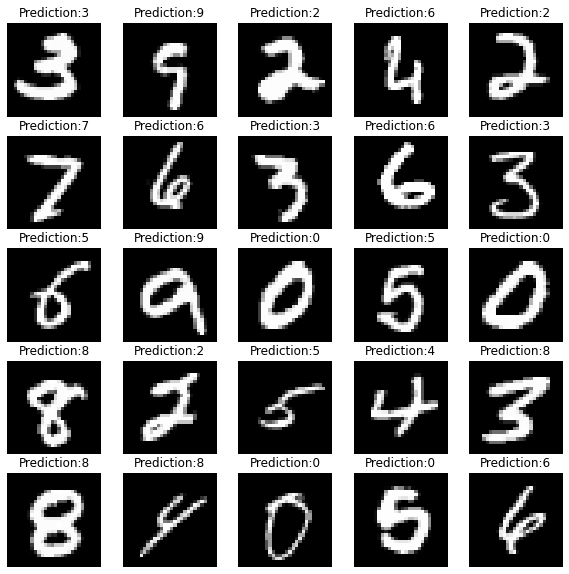

In [12]:
with torch.no_grad():
    net.eval() # to evaluation mode 
    X, y = next(iter(val_loader))
    y_pred = net(X.to(device))
    y_pred = y_pred.argmax(axis=1)
        
    plt.figure(figsize=(10,10))
    for i,(X,y_p) in enumerate(zip(X,y_pred)):
        plt.subplot(5, 5, i+1)
        plt.imshow(X.permute(1,2,0), cmap='gray')
        plt.axis('off')
        plt.title(f"Prediction:{y_p}")
        if i == 24:
            break
plt.savefig("result.png")
print ("Done")

In [7]:
X[i].shape

torch.Size([28, 28])